## D. Mohammad Abdulla
## AIE21044
## D-Sec 

### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it. 

In [32]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram

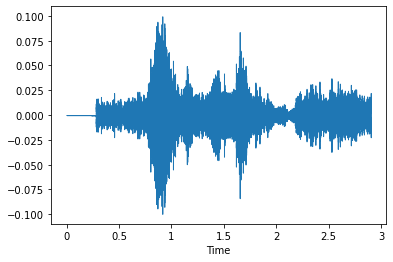

In [14]:
y, sr = librosa.load('Abdulla.mp3')
librosa.display.waveshow(y)

In [15]:
a = glob('Statement.mp3')
ipd.Audio(a[0])

In [16]:
# Use numpy.fft.fft() to transform into spectral domain
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


C:\Users\Abdulla\anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [17]:
# Calculate the amplitude spectrum 
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))

amplitude spectrum


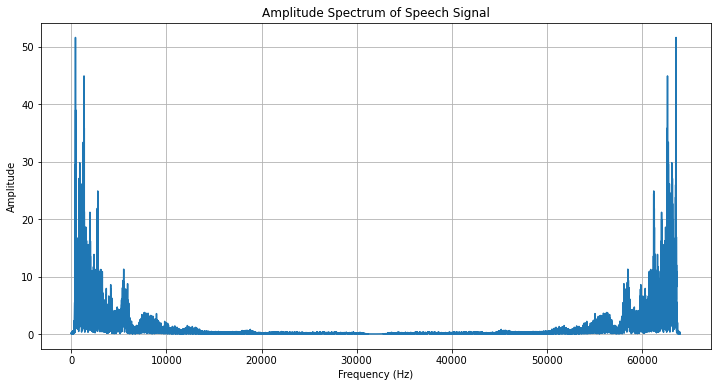

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### A2. Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

In [19]:
# Use numpy.fft.ifft() to transform the speech signal from frequency domain to its time domain
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.display(ipd.Audio(ifft_result, rate=sr))

after reconstruction


C:\Users\Abdulla\anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


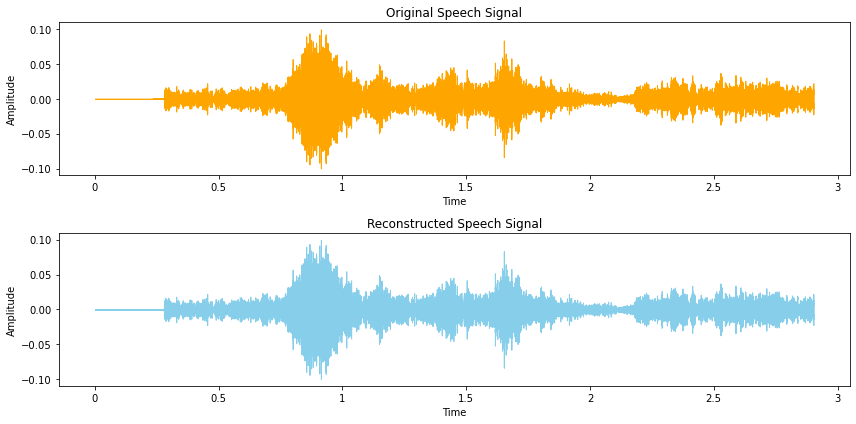

In [22]:
# Plot the original and reconstructed signals for comparison
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='orange')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='skyblue')  # Use np.real() to extract the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal. 

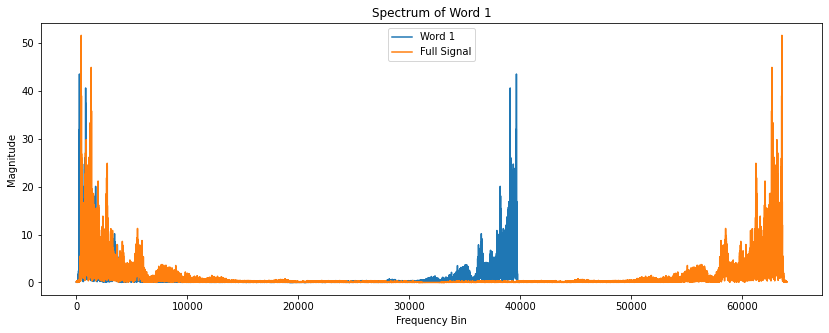

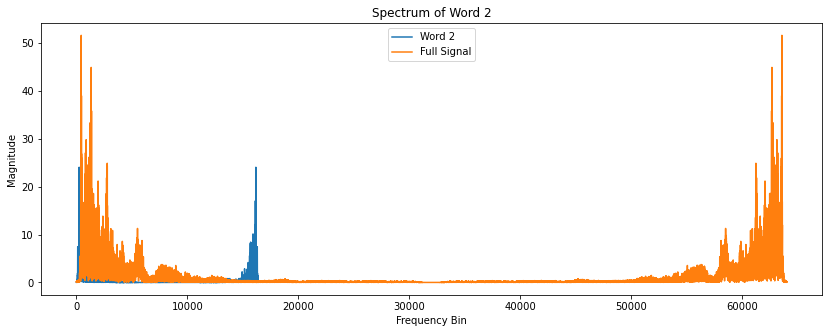

In [24]:
threshold = np.percentile(np.abs(y), 92)
segments = librosa.effects.split(y, top_db=-10 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = y[start:end]
    D_full = np.fft.fft(y)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

### A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components. 

In [25]:
# Define the parameters for the rectangular window
window_size = int(0.02 * sr)  # 20 milliseconds window size
overlap = int(0.01 * sr)  # 10 milliseconds overlap

# Apply the window to the signal with overlap
y_windowed = librosa.effects.preemphasis(y)
y_frames = librosa.util.frame(y_windowed, frame_length=window_size, hop_length=overlap)

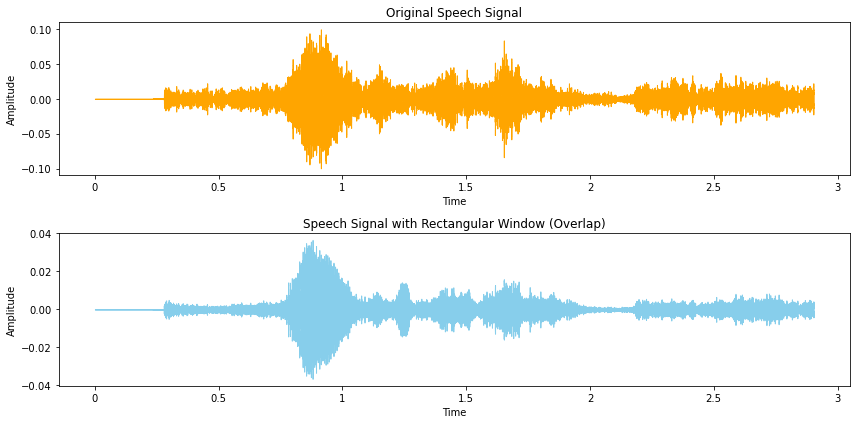

rectangular window


In [27]:
# Display the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='orange')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the windowed signal (considering overlap)
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, color='skyblue')
plt.title('Speech Signal with Rectangular Window (Overlap)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("rectangular window")
ipd.display(ipd.Audio(y_windowed, rate=sr))

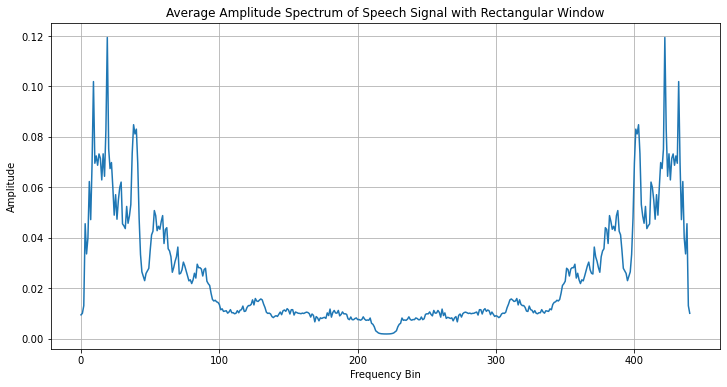

In [28]:
# Apply FFT to each windowed segment
fft_results_windowed = np.fft.fft(y_frames, axis=0)

# Calculate the amplitude spectrum of the windowed signal
amplitude_spectrum_windowed = np.abs(fft_results_windowed)

# Display the amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(np.mean(amplitude_spectrum_windowed, axis=1))  # Plot the average spectrum
plt.title('Average Amplitude Spectrum of Speech Signal with Rectangular Window')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this. 

In [29]:
frequencies, times, spectrogram = signal.stft(y, fs=sr, nperseg=window_size, noverlap=overlap)

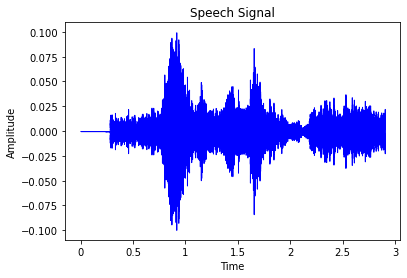

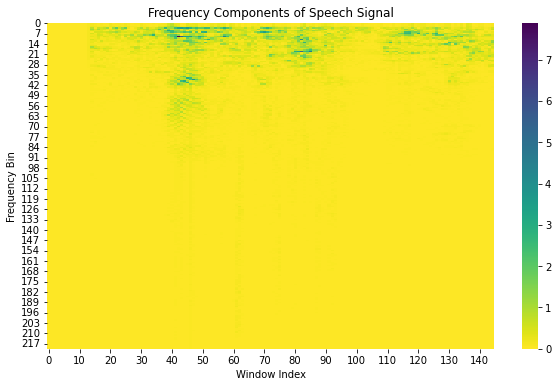

In [30]:
librosa.display.waveshow(y, sr=sr, color = 'blue')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis_r', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

### A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots. 

C:\Users\Abdulla\AppData\Local\Temp\ipykernel_10356\3548733323.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')


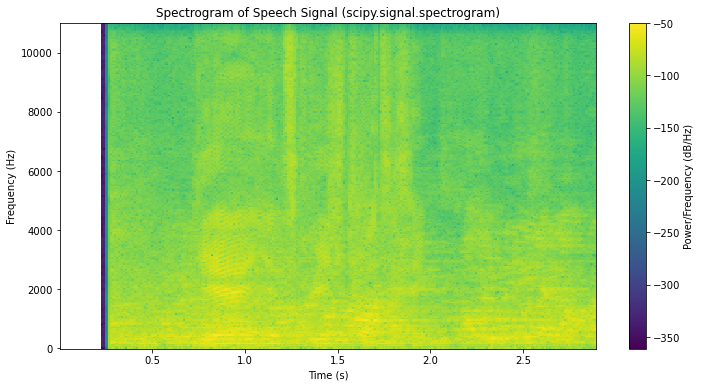

In [33]:
frequencies, times, Sxx = spectrogram(y, fs=sr, nperseg=window_size, noverlap=overlap)

# Display the spectrogram using matplotlib
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')

plt.title('Spectrogram of Speech Signal (scipy.signal.spectrogram)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

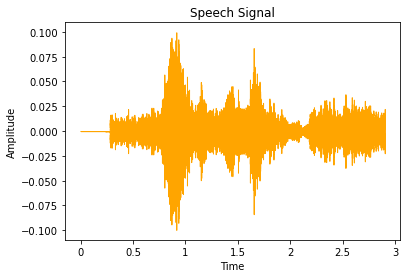

C:\Users\Abdulla\AppData\Local\Temp\ipykernel_10356\2409402419.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


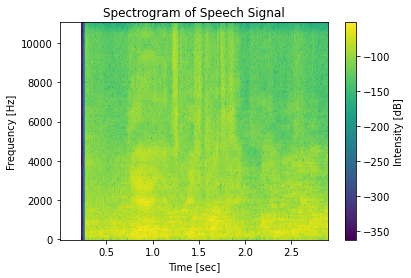

In [35]:
from scipy.signal import spectrogram

librosa.display.waveshow(y, color = 'orange')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()